##Backtest usando fastquant



<a href="https://colab.research.google.com/github/enzoampil/fastquant/blob/master/examples/2020-05-20-backtest_crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#instalando fastquant
!pip install fastquant

     |████████████████████████████████| 5.3 MB 32.5 MB/s 
     |████████████████████████████████| 503 kB 48.1 MB/s 
     |████████████████████████████████| 2.2 MB 47.8 MB/s 
     |████████████████████████████████| 156 kB 58.9 MB/s 
     |████████████████████████████████| 410 kB 54.7 MB/s 
     |████████████████████████████████| 6.3 MB 73.6 MB/s 
     |████████████████████████████████| 191 kB 72.6 MB/s 
     |████████████████████████████████| 138 kB 59.5 MB/s 
     |████████████████████████████████| 97 kB 7.5 MB/s 
     |████████████████████████████████| 1.5 MB 33.5 MB/s 
     |████████████████████████████████| 843 kB 44.0 MB/s 
     |████████████████████████████████| 1.1 MB 48.9 MB/s 
     |████████████████████████████████| 3.6 MB 43.8 MB/s 
     |████████████████████████████████| 271 kB 48.9 MB/s 
     |████████████████████████████████| 160 kB 60.3 MB/s 
     |████████████████████████████████| 291 kB 55.3 MB/s 
     |████████████████████████████████| 192 kB 62.8 MB/s 
     |██████████

## Pega dados da Binance

In [42]:
# preço do bitcoin
from fastquant import get_crypto_data

crypto = get_crypto_data("BTC/USDT", 
                         "2020-10-01", 
                         "2021-10-31",
                         time_resolution='1d'
                        )

In [43]:
crypto.tail()

,open,high,low,close,volume
dt,,,,,
2021-10-27,60328.81,61496.00,58000.00,58413.44,62124.49016
2021-10-28,58413.44,62499.00,57820.00,60575.89,61056.35301
2021-10-29,60575.90,62980.00,60174.81,62253.71,43973.90414
2021-10-30,62253.70,62359.25,60673.00,61859.19,31478.12566
2021-10-31,61859.19,62405.30,59945.36,61299.80,39267.63794


## Executando Backtesting com conjunto de valores

In [44]:
# Usando Cruzamento de Médias Móveis 
from fastquant import backtest

results = backtest('smac', 
                   crypto, 
                   fast_period=[7,14,21,28], 
                   slow_period=[30,45,60,75],
                   plot=False,
                   verbose=False
                  )

In [46]:
#tabela de resultados
results.head()

,strat_id,init_cash,buy_prop,sell_prop,fractional,slippage,single_position,commission,stop_loss,stop_trail,take_profit,execution_type,channel,symbol,allow_short,short_max,add_cash_amount,add_cash_freq,invest_div,fast_period,slow_period,rtot,ravg,rnorm,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value,total,win_rate,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,12,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,28,30,0.616255,0.001556,0.480178,48.017800,11,7.077086,14104.83,"{'len': 106, 'drawdown': 19.857802014983818, '...",19.857802,106,0.976525,85197.96,185197.96,15,0.600000,9.0,5.0,9518.971111,9.518971,-4503.578,-4.503578,24456.48,24.45648,-9271.80,-9.27180
1,11,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,21,75,0.358745,0.000906,0.256453,25.645288,11,6.163764,9403.22,"{'len': 29, 'drawdown': 18.95358044839653, 'mo...",18.953580,29,0.953654,43153.24,143153.24,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,28,75,0.314269,0.000794,0.221390,22.139010,11,6.426077,9403.22,"{'len': 29, 'drawdown': 19.9400170792366, 'mon...",19.940017,29,0.945837,36925.86,136925.86,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,30,0.247172,0.000624,0.170337,17.033673,201,14.962882,22529.54,"{'len': 201, 'drawdown': 38.55849444163733, 'm...",38.558494,201,0.928673,28039.98,128039.98,5,0.400000,2.0,2.0,21336.810000,21.336810,-17144.630,-17.144630,26801.44,26.80144,-17219.04,-17.21904
4,3,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,75,0.227733,0.000575,0.155948,15.594837,11,6.966471,9403.22,"{'len': 92, 'drawdown': 20.154375550762015, 'm...",20.154376,92,0.921799,25575.02,125575.02,3,0.333333,1.0,1.0,6282.680000,6.282680,-6907.240,-6.907240,6282.68,6.28268,-6907.24,-6.90724


Isso é um lucro máximo de 85,20% usando apenas o SMAC 

In [48]:
#pega os melhores parâmetros da linha superior(anterior)
fast_best, slow_best = results.iloc[0][["fast_period","slow_period"]]
fast_best, slow_best

(28, 30)

## Roda o Backtest usando os valores ótimos encontrados anteriormente


In [49]:
import matplotlib as pl
pl.style.use("default")
pl.rcParams["figure.figsize"] = (9,5)

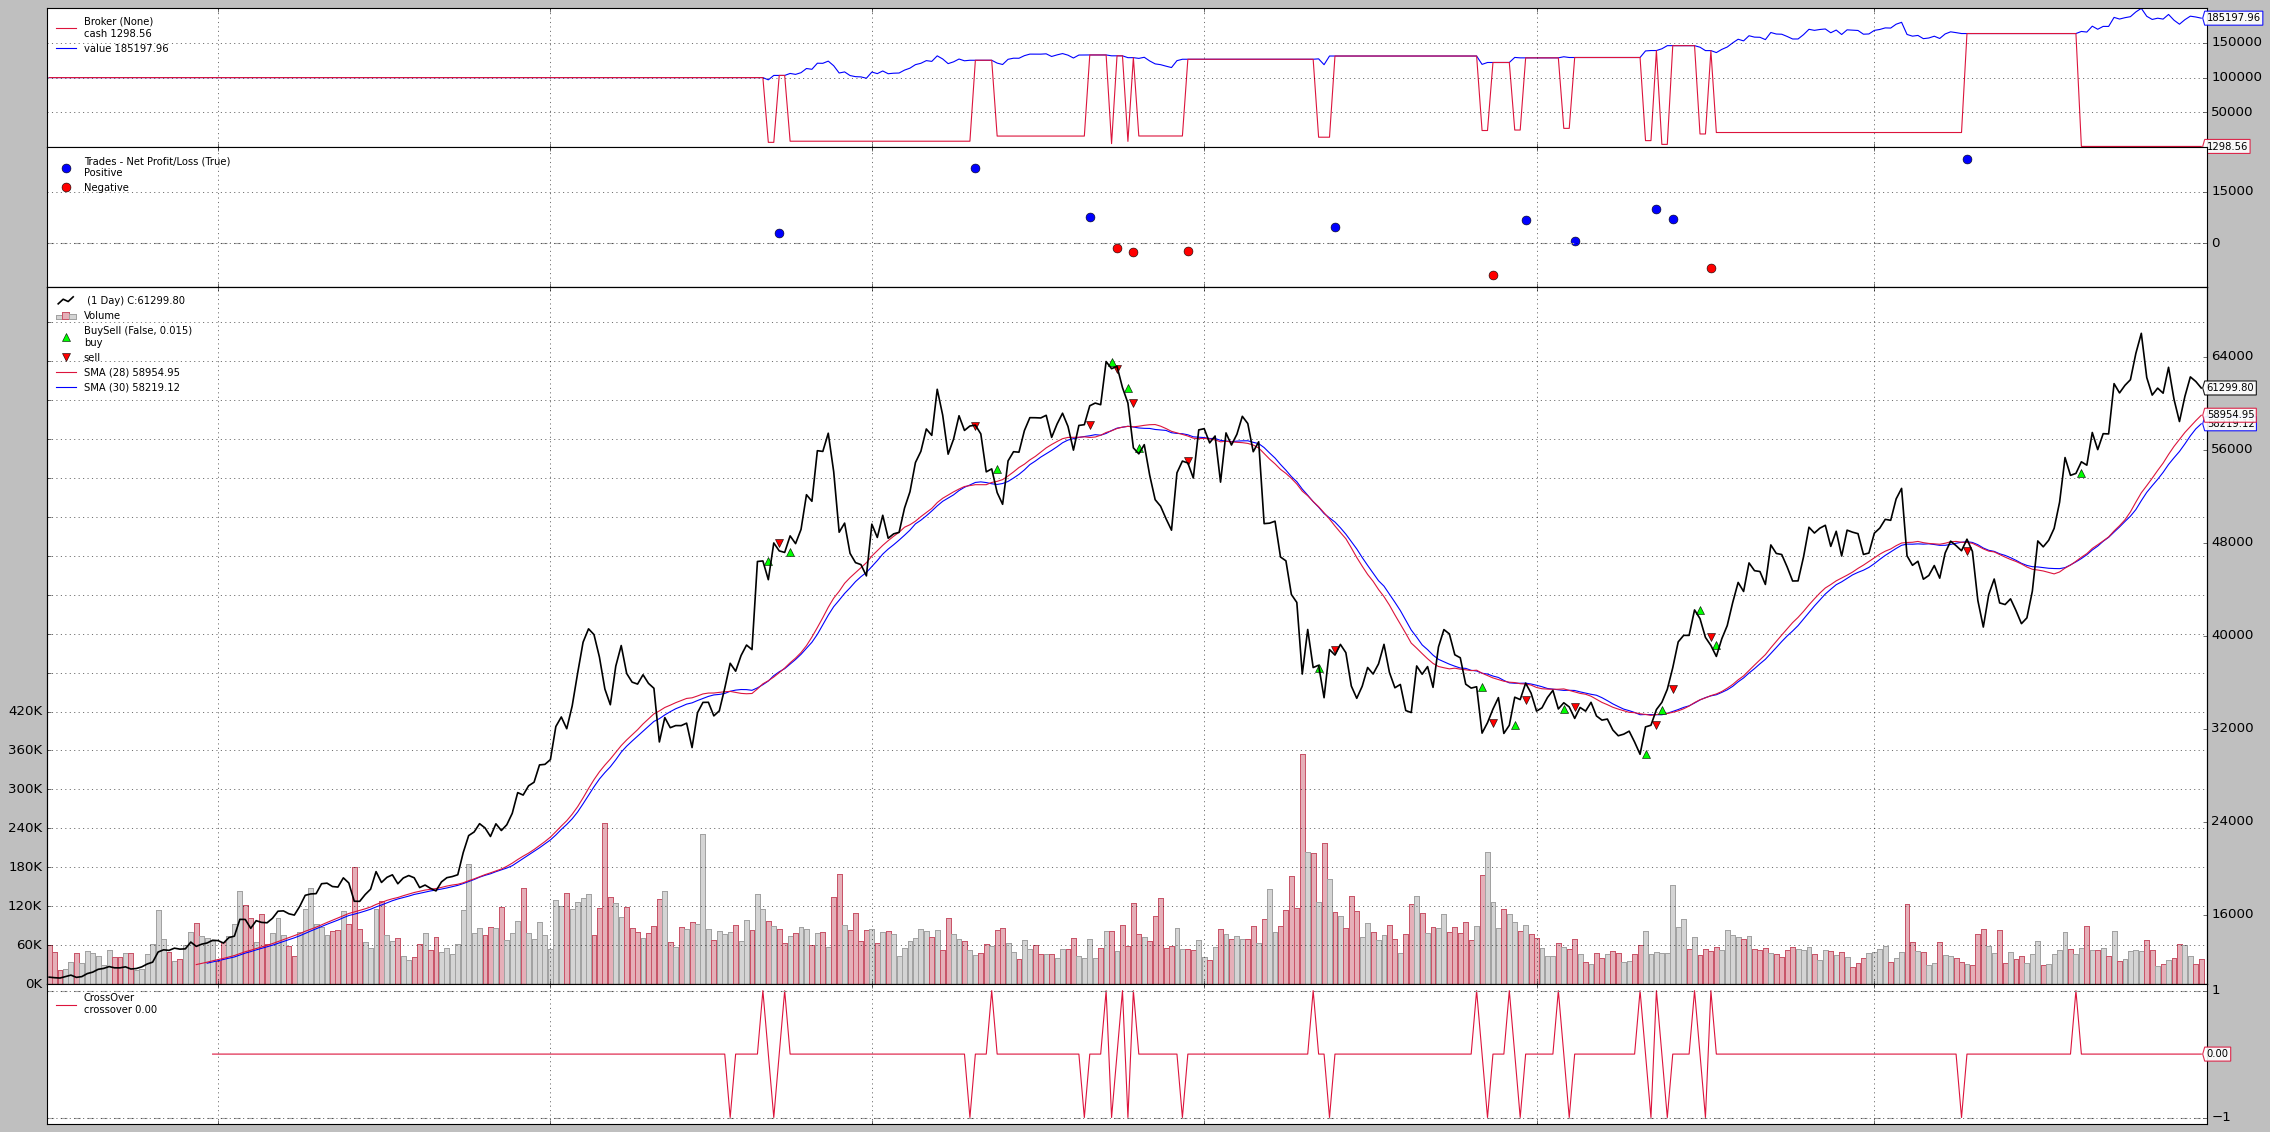

In [50]:
#mostra resultados com novos valores otimizados
results = backtest('smac', 
                   crypto, 
                   fast_period=fast_best, 
                   slow_period=slow_best,
                   plot=True,
                   verbose=False
                  )

## Acessando histórico de transações

Isso é feito definindo return_history = True.

### Estratégia Simples

In [51]:
results, history = backtest('smac', 
                               crypto, 
                               fast_period=fast_best, 
                               slow_period=slow_best,
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

In [52]:
results

,strat_id,init_cash,buy_prop,sell_prop,fractional,slippage,single_position,commission,stop_loss,stop_trail,take_profit,execution_type,channel,symbol,allow_short,short_max,add_cash_amount,add_cash_freq,invest_div,fast_period,slow_period,rtot,ravg,rnorm,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value,total,win_rate,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,0,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,28,30,0.616255,0.001556,0.480178,48.0178,11,7.077086,14104.83,"{'len': 106, 'drawdown': 19.857802014983818, '...",19.857802,106,0.976525,85197.96,185197.96,15,0.6,9,5,9518.971111,9.518971,-4503.578,-4.503578,24456.48,24.45648,-9271.8,-9.2718


Com os Valores otimizados a performance é 457,70%.

In [53]:
history.keys()

dict_keys(['orders', 'periodic', 'indicators'])

In [54]:
orders = history['orders']
orders

,strat_id,strat_name,dt,type,price,size,value,commission,pnl
0,0,fast_period28_slow_period30,2021-02-10,buy,46420.42,2,92840.84,0.0,0.00
1,0,fast_period28_slow_period30,2021-02-12,sell,47969.51,-2,92840.84,0.0,3098.18
2,0,fast_period28_slow_period30,2021-02-14,buy,47153.69,2,94307.38,0.0,0.00
3,0,fast_period28_slow_period30,2021-03-20,sell,58030.01,-2,94307.38,0.0,21752.64
4,0,fast_period28_slow_period30,2021-03-24,buy,54340.89,2,108681.78,0.0,0.00
5,0,fast_period28_slow_period30,2021-04-10,sell,58142.54,-2,108681.78,0.0,7603.30
6,0,fast_period28_slow_period30,2021-04-14,buy,63575.00,2,127150.00,0.0,0.00
7,0,fast_period28_slow_period30,2021-04-15,sell,62959.53,-2,127150.00,0.0,-1230.94
8,0,fast_period28_slow_period30,2021-04-17,buy,61334.80,2,122669.60,0.0,0.00
9,0,fast_period28_slow_period30,2021-04-18,sell,60006.66,-2,122669.60,0.0,-2656.28


O valor final dos resultados pode ser calculado a partir da comissão e pnl (lucro e perda = profit e loss) de todas as transações fechadas (compradas e vendidas) no histórico:



In [55]:
r = results.squeeze()
r.final_value

185197.96000000002

In [56]:
r.init_cash + orders.pnl.sum() - orders.commission.sum()

163152.85000000003

### estratégia de sinal único com pesquisa de grade

In [57]:
results, history = backtest('smac', 
                               crypto, 
                               fast_period=[7,14,21], 
                               slow_period=[30,45,60],
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

In [58]:
orders = history['orders']
orders.strat_id.unique(), orders.strat_name.unique()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array(['fast_period7_slow_period30', 'fast_period7_slow_period45',
        'fast_period7_slow_period60', 'fast_period14_slow_period30',
        'fast_period14_slow_period45', 'fast_period14_slow_period60',
        'fast_period21_slow_period30', 'fast_period21_slow_period45',
        'fast_period21_slow_period60'], dtype=object))

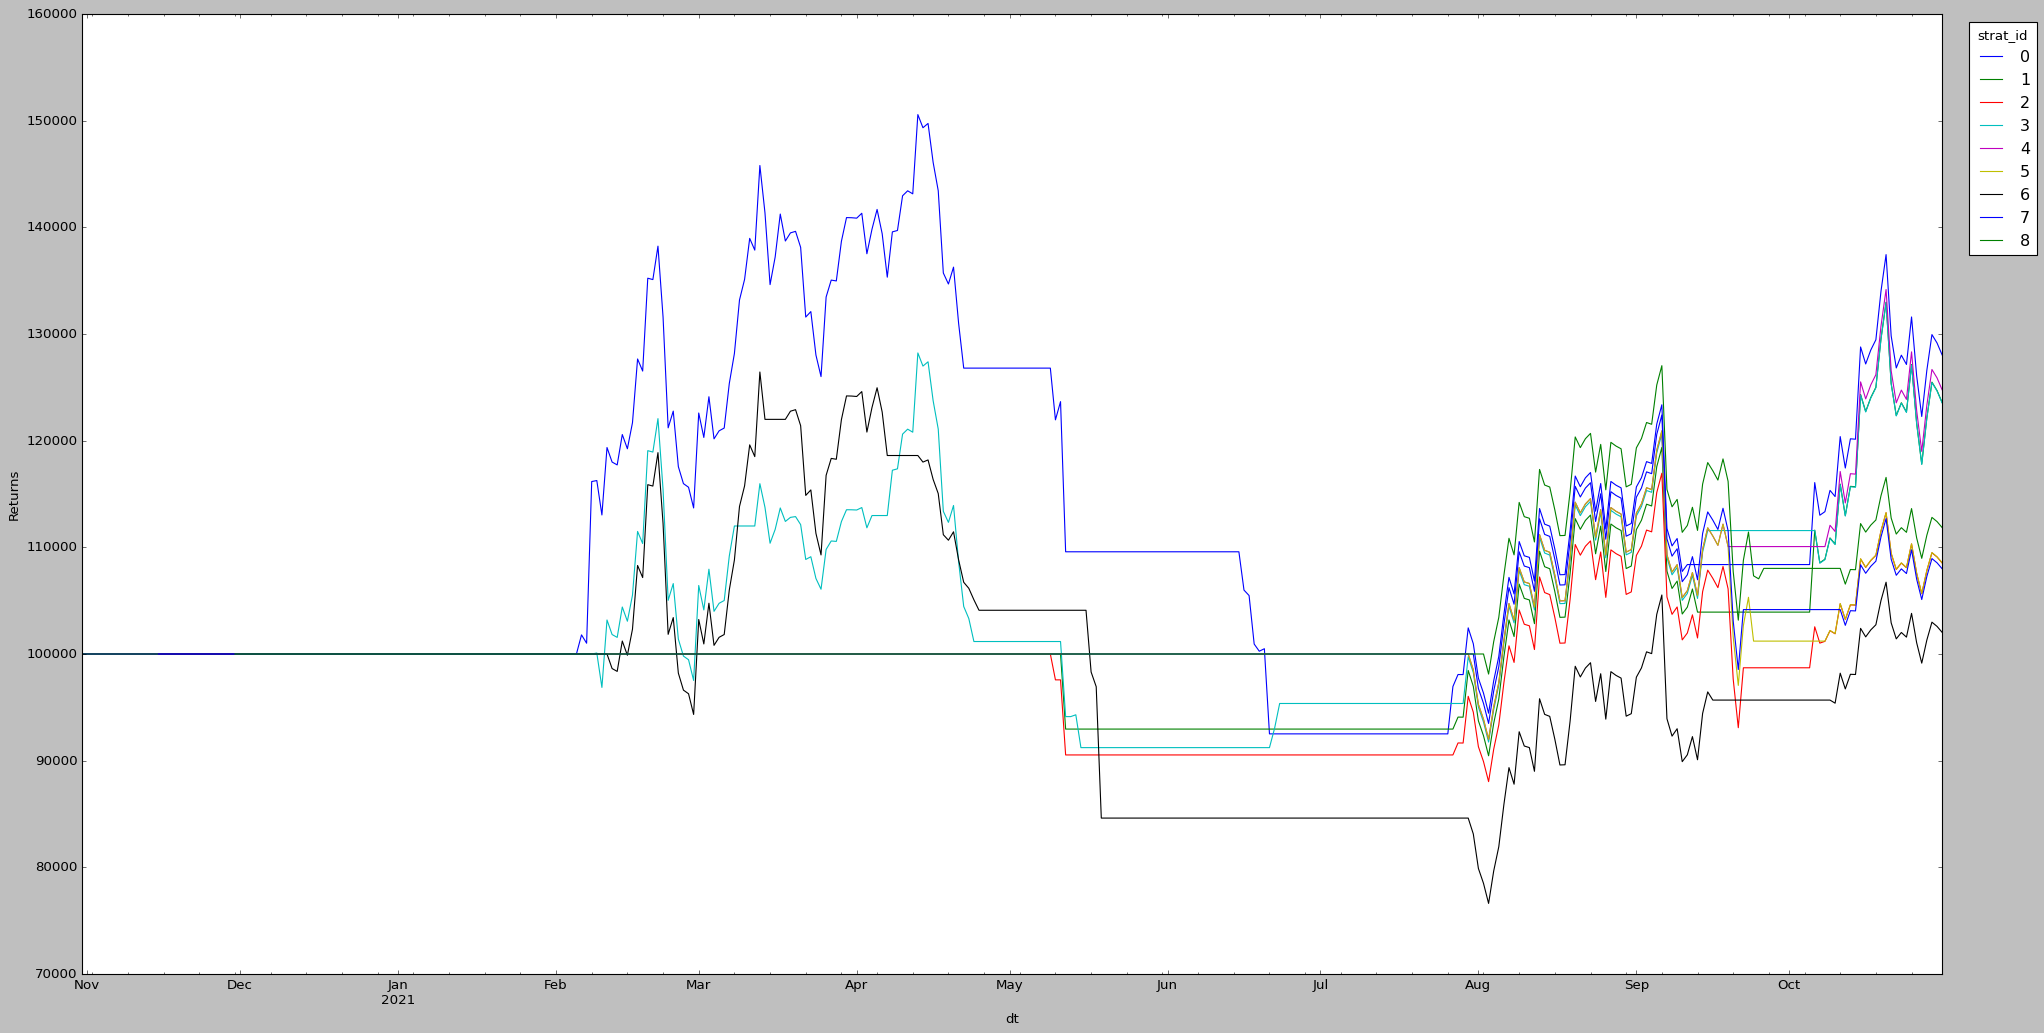

In [59]:
key = 'strat_id'
periodic = history['periodic']
g = periodic.set_index('dt').groupby(key)
axs = g.portfolio_value.plot(legend=key)
axs[0].set_ylabel('Returns')
axs[0].legend(g.groups, title=key, bbox_to_anchor=(1.01, 1), loc='upper left')

### estratégia multi sinal

In [60]:
# essa estratégia usa varios sinais(Cruzamento de média movel e RSI)
from fastquant import backtest

strats= {
       'smac': {
           'fast_period': 7, 
           'slow_period': 60
            },
        'rsi': {
            'rsi_upper': 70,
            'rsi_lower': 30 
        }
   }
results, history = backtest('multi', 
                               crypto, 
                               strats=strats,
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

2021-10-31T00:00:00, ===Global level arguments===
2021-10-31T00:00:00, init_cash : 100000
2021-10-31T00:00:00, buy_prop : 1
2021-10-31T00:00:00, sell_prop : 1
2021-10-31T00:00:00, commission : 0
2021-10-31T00:00:00, stop_loss : 0
2021-10-31T00:00:00, stop_trail : 0
2021-10-31T00:00:00, take_profit : 0
===Strategy level arguments===
fast_period : 7
slow_period : 60
2021-10-31T00:00:00, ===Global level arguments===
2021-10-31T00:00:00, init_cash : 100000
2021-10-31T00:00:00, buy_prop : 1
2021-10-31T00:00:00, sell_prop : 1
2021-10-31T00:00:00, commission : 0
2021-10-31T00:00:00, stop_loss : 0
2021-10-31T00:00:00, stop_trail : 0
2021-10-31T00:00:00, take_profit : 0
===Strategy level arguments===
rsi_period : 14
rsi_upper : 70
rsi_lower : 30
2021-05-09T00:00:00, BUY CREATE, 58240.84
2021-05-09T00:00:00, Cash: 100000.0
2021-05-09T00:00:00, Price: 58240.84
2021-05-09T00:00:00, Buy prop size: 1.7152929095820033
2021-05-09T00:00:00, Afforded size: 1.7152929095820033
2021-05-09T00:00:00, Final s

In [61]:
results

,strat_id,init_cash,buy_prop,sell_prop,smac.fractional,smac.slippage,smac.single_position,smac.commission,smac.stop_loss,smac.stop_trail,smac.take_profit,execution_type,smac.channel,smac.symbol,smac.allow_short,smac.short_max,smac.add_cash_amount,smac.add_cash_freq,smac.invest_div,smac.fast_period,smac.slow_period,rsi.fractional,rsi.slippage,rsi.single_position,rsi.commission,rsi.stop_loss,rsi.stop_trail,rsi.take_profit,rsi.channel,rsi.symbol,rsi.allow_short,rsi.short_max,rsi.add_cash_amount,rsi.add_cash_freq,rsi.invest_div,rsi.rsi_period,rsi.rsi_upper,rsi.rsi_lower,rtot,ravg,rnorm,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value,total,win_rate,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,0,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,70,30,-0.135331,-0.000342,-0.082516,-8.25158,175,12.65735,12657.35,"{'len': 175, 'drawdown': 36.95878, 'moneydown'...",36.95878,175,-1.158011,-12657.35,87342.65,2,0.0,0,1,0.0,0.0,-7036.96,-7.03696,0.0,0.0,-7036.96,-7.03696


usando estratégia multisinal a performance é 200,94%

In [62]:
orders = history['orders']
orders.strat_id.unique(), orders.strat_name.unique()

(array([0]),
 array(['smac.fast_period7_slow_period60', 'rsi.rsi_upper70_rsi_lower30'],
       dtype=object))

In [63]:
from fastquant import backtest

strats= {
       'smac': {
           'fast_period': [7,14], 
           'slow_period': [30,60]
            },
        'rsi': {
            'rsi_upper': [70,80],
            'rsi_lower': [20,30] 
        }
   }
results, history = backtest('multi', 
                               crypto, 
                               strats=strats,
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

2021-10-31T00:00:00, ===Global level arguments===
2021-10-31T00:00:00, init_cash : 100000
2021-10-31T00:00:00, buy_prop : 1
2021-10-31T00:00:00, sell_prop : 1
2021-10-31T00:00:00, commission : 0
2021-10-31T00:00:00, stop_loss : 0
2021-10-31T00:00:00, stop_trail : 0
2021-10-31T00:00:00, take_profit : 0
===Strategy level arguments===
fast_period : 7
slow_period : 30
2021-10-31T00:00:00, ===Global level arguments===
2021-10-31T00:00:00, init_cash : 100000
2021-10-31T00:00:00, buy_prop : 1
2021-10-31T00:00:00, sell_prop : 1
2021-10-31T00:00:00, commission : 0
2021-10-31T00:00:00, stop_loss : 0
2021-10-31T00:00:00, stop_trail : 0
2021-10-31T00:00:00, take_profit : 0
===Strategy level arguments===
rsi_period : 14
rsi_upper : 70
rsi_lower : 20
2021-02-05T00:00:00, BUY CREATE, 38290.24
2021-02-05T00:00:00, Cash: 100000.0
2021-02-05T00:00:00, Price: 38290.24
2021-02-05T00:00:00, Buy prop size: 2.609022557709221
2021-02-05T00:00:00, Afforded size: 2.609022557709221
2021-02-05T00:00:00, Final siz

In [64]:
orders = history['orders']
orders.strat_id.unique(), orders.strat_name.unique()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 array(['smac.fast_period7_slow_period30', 'rsi.rsi_upper70_rsi_lower20',
        'rsi.rsi_upper70_rsi_lower30', 'rsi.rsi_upper80_rsi_lower20',
        'rsi.rsi_upper80_rsi_lower30', 'smac.fast_period7_slow_period60',
        'smac.fast_period14_slow_period30',
        'smac.fast_period14_slow_period60'], dtype=object))

### custom strategy

In [65]:
import numpy as np

#add a column which is a proxy buy/sell indicator for custom strategy
crypto["custom"] = crypto.close.pct_change()

In [66]:
results, history = backtest('custom', 
                                crypto, 
                                upper_limit=0.05, 
                                lower_limit=-0.05,
                                plot=False,
                                verbose=False,
                                return_history=True
                                )

===Strategy level arguments===
Upper limit:  0.05
Lower limit:  -0.05


In [67]:
orders = history['orders']
orders.strat_id.unique(), orders.strat_name.unique()

(array([0]), array(['upper_limit0.05_lower_limit-0.05'], dtype=object))